### Import Necessary Libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns


### 2. Load and Preprocess Data

In [4]:
# Load the dataset
df = pd.read_csv('kenyan_car_dataset.csv')

# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

# Define numeric features
numeric_features = ['Year', 'Engine Size (L)', 'Mileage (km)', 'Previous Owners']

# Scale numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Separate features and target variable
X = df.drop(columns=['Resale Value (Ksh)'])
y = df['Resale Value (Ksh)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Define and Compile the Model

In [5]:
# Define the model
from tensorflow.keras.layers import Dropout

deep_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
deep_model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\hp\Music\Carfind_mobile_app-main\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Train the Model

In [7]:
# Train the model
deep_history = deep_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50487365632.0000 - val_loss: 26497757184.0000
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 50558554112.0000 - val_loss: 26034847744.0000
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 51671281664.0000 - val_loss: 26151194624.0000
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48814583808.0000 - val_loss: 25746286592.0000
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 47591837696.0000 - val_loss: 25012410368.0000
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 48583983104.0000 - val_loss: 24396261376.0000
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 46721466368.0000 - val_loss: 24224753664.0000
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48562905088.0000 - val_loss: 23869231104.0000
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48546119680.0000 - val_loss: 23210397696.0000
Epoch 10/200
200/200 ━━━━━━━━━━━━━━━━

In [10]:
# Save the entire model to a HDF5 file
deep_model.save('deep_modell.h5')

### 5. Evaluate and Calculate Metrics

In [12]:
# Evaluate the model

predictions = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)s
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


NameError: name 'predictions' is not defined

### 6. Plot Training History

To visualize the training process and check for issues like overfitting, you can plot the training and validation loss over epochs.

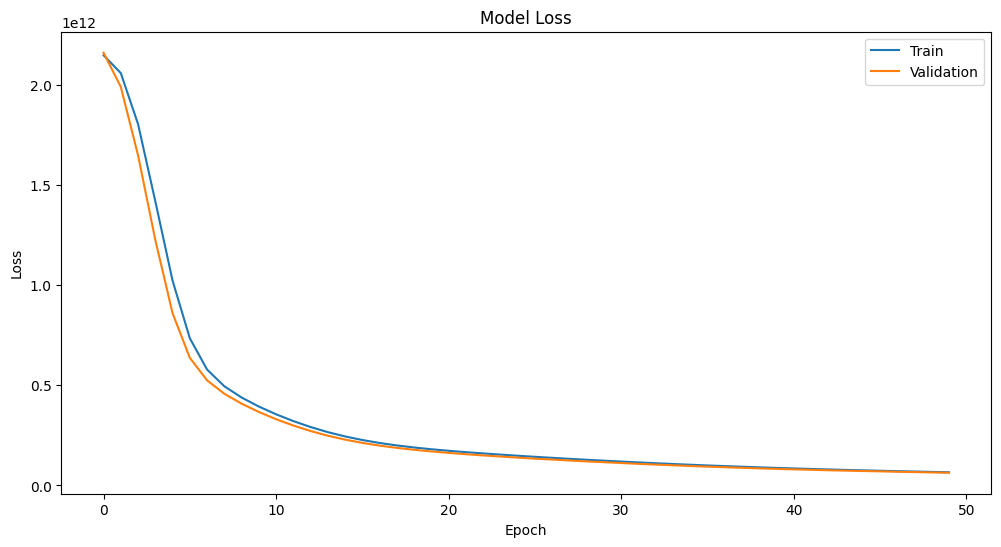

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


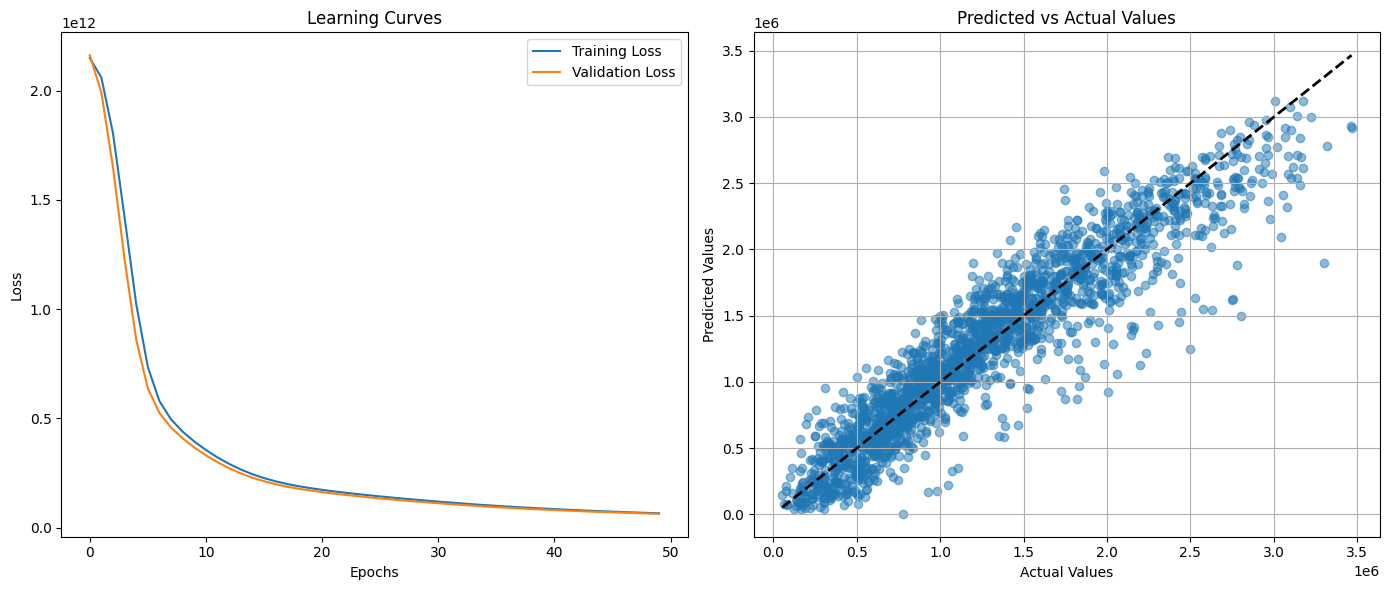

In [17]:
# Learning Curves
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Predicted vs Actual Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


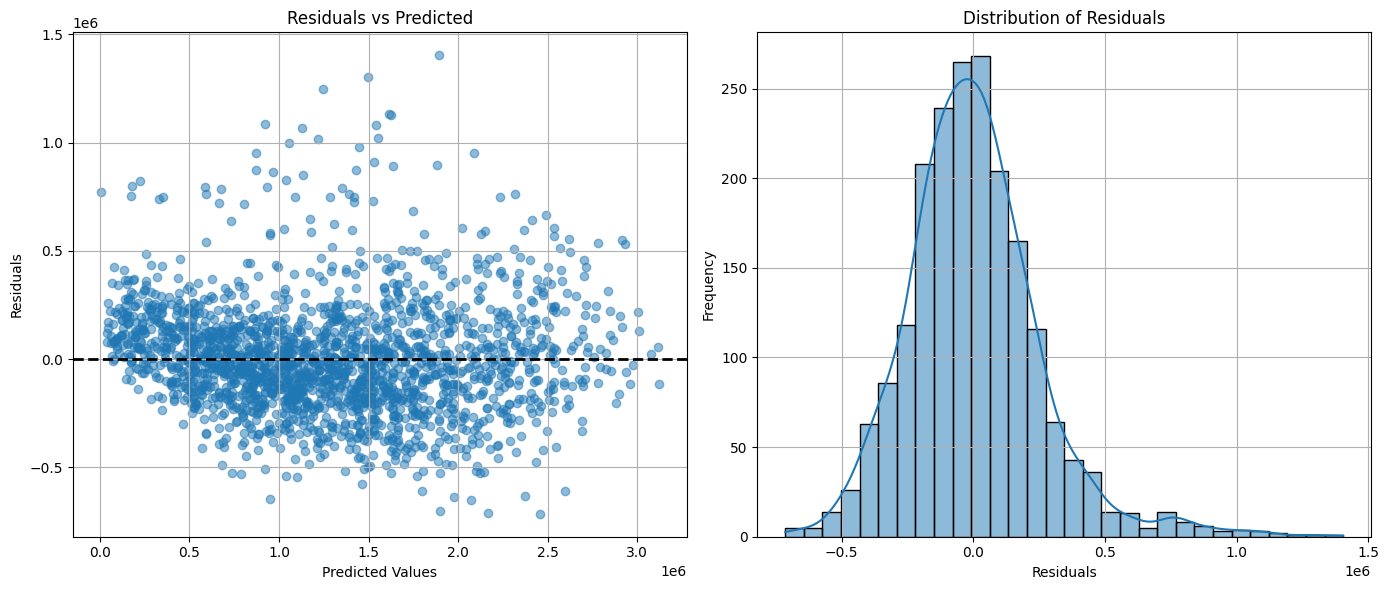

In [23]:
# Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Distribution of Errors
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()